In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of rows in the dataset
num_rows = 100000

# Age (between 18 and 90)
ages = np.random.normal(45, 15, num_rows).clip(18, 90).astype(int)

# Gender (Male or Female)
genders = np.random.choice(['Male', 'Female'], num_rows)

# Blood Pressure (systolic/diastolic)
systolic = np.random.normal(120, 15, num_rows).clip(90, 180).astype(int)
diastolic = np.random.normal(80, 10, num_rows).clip(60, 120).astype(int)
blood_pressure = [f"{s}/{d}" for s, d in zip(systolic, diastolic)]

# Glucose levels (70-200 mg/dL)
glucose = np.random.normal(100, 30, num_rows).clip(70, 200).astype(int)

# Hypertension (Yes or No) based on systolic/diastolic pressure
hypertension = ['Yes' if s > 140 or d > 90 else 'No' for s, d in zip(systolic, diastolic)]

# Chronic Disease types
chronic_diseases = np.random.choice(['Diabetes', 'Hypertension', 'Asthma', 'Arthritis', 'Heart Disease', 'COPD'], num_rows)

# Condition based on Chronic Disease
conditions = []
for disease in chronic_diseases:
    if disease == 'Diabetes':
        conditions.append(np.random.choice(['Mild', 'Moderate', 'Severe'], p=[0.4, 0.4, 0.2]))
    elif disease == 'Hypertension':
        conditions.append(np.random.choice(['Mild', 'Moderate', 'Severe'], p=[0.5, 0.4, 0.1]))
    elif disease == 'Asthma':
        conditions.append(np.random.choice(['Mild', 'Moderate', 'Severe'], p=[0.6, 0.3, 0.1]))
    elif disease == 'Arthritis':
        conditions.append(np.random.choice(['Mild', 'Moderate', 'Severe'], p=[0.7, 0.2, 0.1]))
    elif disease == 'Heart Disease':
        conditions.append(np.random.choice(['Mild', 'Moderate', 'Severe'], p=[0.3, 0.4, 0.3]))
    elif disease == 'COPD':
        conditions.append(np.random.choice(['Mild', 'Moderate', 'Severe'], p=[0.4, 0.3, 0.3]))

# Treatment Types based on Chronic Disease and Condition
treatment_types = []
for disease, condition in zip(chronic_diseases, conditions):
    if disease == 'Diabetes':
        if condition == 'Mild':
            treatment_types.append('Lifestyle Changes')
        elif condition == 'Moderate':
            treatment_types.append('Insulin Therapy')
        else:
            treatment_types.append('Medication')
    elif disease == 'Hypertension':
        if condition == 'Mild':
            treatment_types.append('Lifestyle Changes')
        elif condition == 'Moderate':
            treatment_types.append('Medication')
        else:
            treatment_types.append('Surgery')
    elif disease == 'Asthma':
        if condition == 'Mild':
            treatment_types.append('Inhalers')
        elif condition == 'Moderate':
            treatment_types.append('Medication')
        else:
            treatment_types.append('Oxygen Therapy')
    elif disease == 'Arthritis':
        if condition == 'Mild':
            treatment_types.append('Physiotherapy')
        elif condition == 'Moderate':
            treatment_types.append('Medication')
        else:
            treatment_types.append('Surgery')
    elif disease == 'Heart Disease':
        if condition == 'Mild':
            treatment_types.append('Lifestyle Changes')
        elif condition == 'Moderate':
            treatment_types.append('Medication')
        else:
            treatment_types.append('Surgery')
    elif disease == 'COPD':
        if condition == 'Mild':
            treatment_types.append('Lifestyle Changes')
        elif condition == 'Moderate':
            treatment_types.append('Inhalers')
        else:
            treatment_types.append('Oxygen Therapy')

# Create DataFrame
df = pd.DataFrame({
    'age': ages,
    'gender': genders,
    'blood_pressure': blood_pressure,
    'glucose': glucose,
    'hypertension': hypertension,
    'chronic_disease': chronic_diseases,
    'condition': conditions,
    'treatment_type': treatment_types
})

# Check for null values
print(df.isnull().sum())

# Save to a CSV file
df.to_csv('synthetic_healthcare_data.csv', index=False)

# Preview the first few rows of the dataset
print(df.head())

age                0
gender             0
blood_pressure     0
glucose            0
hypertension       0
chronic_disease    0
condition          0
treatment_type     0
dtype: int64
   age  gender blood_pressure  glucose hypertension chronic_disease condition  \
0   52  Female         137/82      110           No            COPD    Severe   
1   42  Female         118/75       88           No    Hypertension  Moderate   
2   54  Female         111/87       75           No        Diabetes  Moderate   
3   67    Male         116/87      116           No    Hypertension  Moderate   
4   41  Female         119/73      102           No    Hypertension  Moderate   

    treatment_type  
0   Oxygen Therapy  
1       Medication  
2  Insulin Therapy  
3       Medication  
4       Medication  


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('synthetic_healthcare_data.csv')

# Split the 'blood_pressure' column into systolic and diastolic columns
df[['systolic', 'diastolic']] = df['blood_pressure'].str.split('/', expand=True)
df['systolic'] = pd.to_numeric(df['systolic'])
df['diastolic'] = pd.to_numeric(df['diastolic'])

# Drop the original 'blood_pressure' column
df = df.drop(columns=['blood_pressure'])

# Preprocessing
# Convert categorical variables using Label Encoding or One-Hot Encoding
le = LabelEncoder()

# Label encode 'gender', 'hypertension', 'chronic_disease', 'condition', and 'treatment_type'
df['gender'] = le.fit_transform(df['gender'])
df['hypertension'] = le.fit_transform(df['hypertension'])
df['chronic_disease'] = le.fit_transform(df['chronic_disease'])
df['condition'] = le.fit_transform(df['condition'])
df['treatment_type'] = le.fit_transform(df['treatment_type'])

# Features and target variable
X = df.drop('treatment_type', axis=1)  # Features
y = df['treatment_type']  # Target variable

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Feature importance (to understand which features are most influential in the model)
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


Model Accuracy: 100.00%
           Feature  Importance
4  chronic_disease    0.533480
5        condition    0.422155
6         systolic    0.011078
2          glucose    0.011012
0              age    0.010719
7        diastolic    0.009760
1           gender    0.001210
3     hypertension    0.000587


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import joblib

# Load the dataset
df = pd.read_csv('synthetic_healthcare_data.csv')

# Split the 'blood_pressure' column into systolic and diastolic columns
df[['systolic', 'diastolic']] = df['blood_pressure'].str.split('/', expand=True)
df['systolic'] = pd.to_numeric(df['systolic'])
df['diastolic'] = pd.to_numeric(df['diastolic'])

# Drop the original 'blood_pressure' column
df = df.drop(columns=['blood_pressure'])

# Preprocessing
# Convert categorical variables using Label Encoding or One-Hot Encoding
le = LabelEncoder()

# Label encode 'gender', 'hypertension', 'chronic_disease', 'condition', and 'treatment_type'
df['gender'] = le.fit_transform(df['gender'])
df['hypertension'] = le.fit_transform(df['hypertension'])
df['chronic_disease'] = le.fit_transform(df['chronic_disease'])
df['condition'] = le.fit_transform(df['condition'])
df['treatment_type'] = le.fit_transform(df['treatment_type'])

# Features and target variable
X = df.drop('treatment_type', axis=1)  # Features
y = df['treatment_type']  # Target variable

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Save the trained model to a file (trained_model.pkl)
joblib.dump(clf, 'trained_model.pkl')

# Feature importance (to understand which features are most influential in the model)
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


Model Accuracy: 100.00%
           Feature  Importance
4  chronic_disease    0.533480
5        condition    0.422155
6         systolic    0.011078
2          glucose    0.011012
0              age    0.010719
7        diastolic    0.009760
1           gender    0.001210
3     hypertension    0.000587


In [6]:
# Save the encoder as well
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import joblib

# Load the dataset
df = pd.read_csv('synthetic_healthcare_data.csv')

# Split the 'blood_pressure' column into systolic and diastolic columns
df[['systolic', 'diastolic']] = df['blood_pressure'].str.split('/', expand=True)
df['systolic'] = pd.to_numeric(df['systolic'])
df['diastolic'] = pd.to_numeric(df['diastolic'])

# Drop the original 'blood_pressure' column
df = df.drop(columns=['blood_pressure'])

# Preprocessing
# Convert categorical variables using Label Encoding or One-Hot Encoding
le = LabelEncoder()

# Label encode 'gender', 'hypertension', 'chronic_disease', 'condition', and 'treatment_type'
df['gender'] = le.fit_transform(df['gender'])
df['hypertension'] = le.fit_transform(df['hypertension'])
df['chronic_disease'] = le.fit_transform(df['chronic_disease'])
df['condition'] = le.fit_transform(df['condition'])
df['treatment_type'] = le.fit_transform(df['treatment_type'])

# Features and target variable
X = df.drop('treatment_type', axis=1)  # Features
y = df['treatment_type']  # Target variable

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Save the trained model and the LabelEncoder to a file
joblib.dump(clf, 'trained_model.pkl')
joblib.dump(le, 'label_encoder.pkl')  # Save the LabelEncoder

Model Accuracy: 100.00%


['label_encoder.pkl']

In [9]:
print(df['treatment_type'].value_counts())

treatment_type
2    26725
3    25096
0    15008
5    11480
6     8299
1     6733
4     6659
Name: count, dtype: int64


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import joblib

# Load the dataset
df = pd.read_csv('synthetic_healthcare_data.csv')

# Split the 'blood_pressure' column into systolic and diastolic columns
df[['systolic', 'diastolic']] = df['blood_pressure'].str.split('/', expand=True)
df['systolic'] = pd.to_numeric(df['systolic'])
df['diastolic'] = pd.to_numeric(df['diastolic'])

# Drop the original 'blood_pressure' column
df = df.drop(columns=['blood_pressure'])

# Preprocessing
# Convert categorical variables using Label Encoding or One-Hot Encoding
le = LabelEncoder()

# Label encode 'gender', 'hypertension', 'chronic_disease', 'condition', and 'treatment_type'
df['gender'] = le.fit_transform(df['gender'])
df['hypertension'] = le.fit_transform(df['hypertension'])
df['chronic_disease'] = le.fit_transform(df['chronic_disease'])
df['condition'] = le.fit_transform(df['condition'])
df['treatment_type'] = le.fit_transform(df['treatment_type'])

# Features and target variable
X = df.drop('treatment_type', axis=1)  # Features
y = df['treatment_type']  # Target variable

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest classifier with class weights (optional, SMOTE already balances data)
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Print classification report for better evaluation
print(classification_report(y_test, y_pred))

# Save the trained model to a file (trained_model.pkl)
joblib.dump(clf, 'trained_model.pkl')

# Feature importance (to understand which features are most influential in the model)
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

Model Accuracy: 99.80%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3041
           1       1.00      1.00      1.00      1386
           2       1.00      1.00      1.00      5398
           3       1.00      0.99      1.00      4960
           4       1.00      1.00      1.00      1308
           5       1.00      1.00      1.00      2246
           6       0.98      1.00      0.99      1661

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

           Feature  Importance
4  chronic_disease    0.554241
5        condition    0.374980
2          glucose    0.017711
6         systolic    0.016830
0              age    0.016763
7        diastolic    0.014913
1           gender    0.003944
3     hypertension    0.000618


treatment_type
2    26725
3    25096
0    15008
5    11480
6     8299
1     6733
4     6659
Name: count, dtype: int64


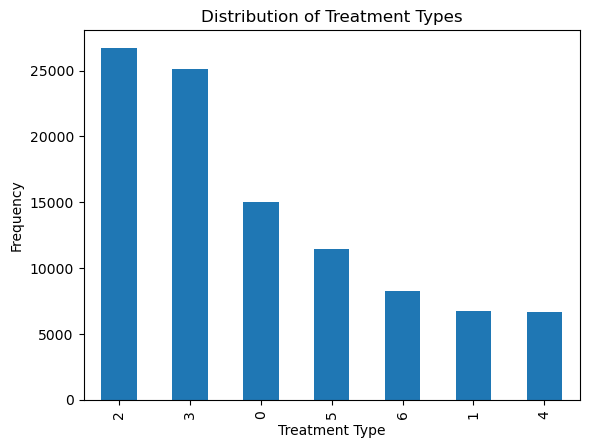

In [11]:
# Check the distribution of the treatment_type classes
print(df['treatment_type'].value_counts())

# Optionally, you can visualize it using a bar plot
import matplotlib.pyplot as plt

df['treatment_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Treatment Types')
plt.xlabel('Treatment Type')
plt.ylabel('Frequency')
plt.show()

In [12]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [14]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('treatment_type', axis=1)
y = df['treatment_type']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print(f"Original dataset size: {len(y_train)}")
print(f"Resampled dataset size: {len(y_res)}")

Original dataset size: 80000
Resampled dataset size: 149289


In [16]:
from imblearn.under_sampling import NearMiss

# Apply NearMiss undersampling technique
near_miss = NearMiss()
X_res, y_res = near_miss.fit_resample(X_train, y_train)

print(f"Original dataset size: {len(y_train)}")
print(f"Resampled dataset size: {len(y_res)}")

Original dataset size: 80000
Resampled dataset size: 37429


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Train the model with balanced class weights
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_res, y_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [18]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3041
           1       0.96      1.00      0.98      1386
           2       1.00      1.00      1.00      5398
           3       1.00      0.97      0.98      4960
           4       0.95      1.00      0.98      1308
           5       1.00      1.00      1.00      2246
           6       1.00      1.00      1.00      1661

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



In [19]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced', random_state=42), 
                           param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_res, y_res)

print("Best Parameters: ", grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [20]:
from imblearn.ensemble import BalancedRandomForestClassifier

clf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_res, y_res)

C:\Users\shaik\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\shaik\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForestClassifier(random_state=42)

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_res, y_res, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")

C:\Users\shaik\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\shaik\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\shaik\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\U

Cross-validation scores: [1.         0.99986642 0.99973283 0.99986642 0.9997328 ]


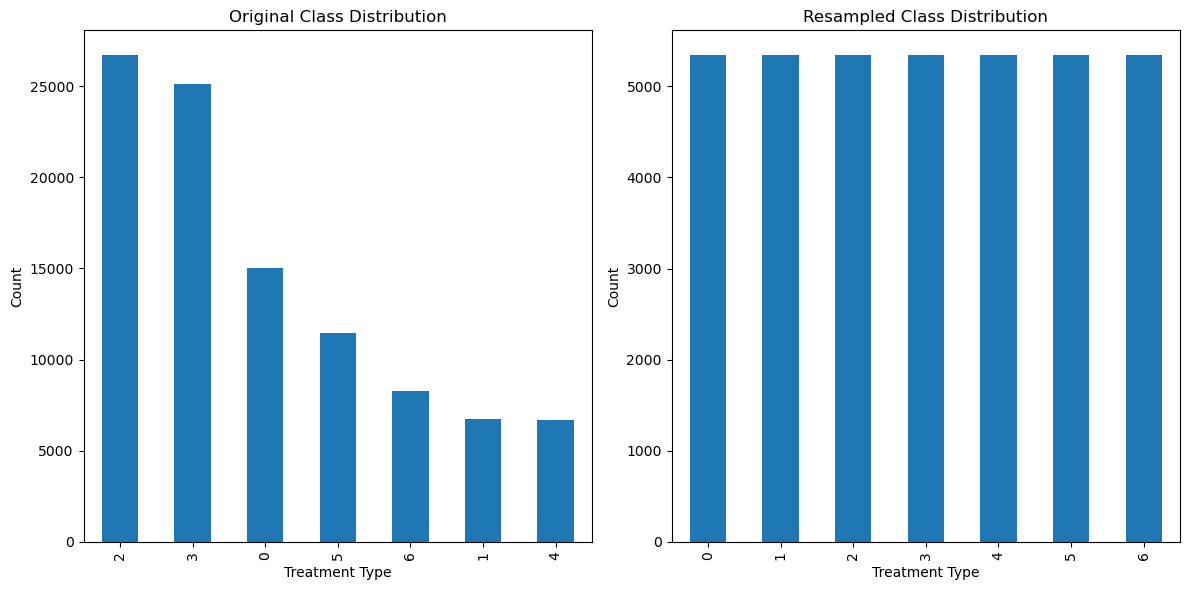

In [22]:
import matplotlib.pyplot as plt

# Plot original class distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['treatment_type'].value_counts().plot(kind='bar')
plt.title('Original Class Distribution')
plt.xlabel('Treatment Type')
plt.ylabel('Count')

# Plot resampled class distribution
plt.subplot(1, 2, 2)
pd.Series(y_res).value_counts().plot(kind='bar')
plt.title('Resampled Class Distribution')
plt.xlabel('Treatment Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Use a model with balanced class weights or the resampled data
clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Evaluate using cross-validation
scores = cross_val_score(clf, X_res, y_res, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-validation accuracy scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

Cross-validation accuracy scores: [1.         0.99986642 0.99986642 1.         0.9997328 ]
Mean cross-validation score: 0.9998931267111656


In [24]:
# Model before resampling
clf_before = RandomForestClassifier(random_state=42)
clf_before.fit(X_train, y_train)
y_pred_before = clf_before.predict(X_test)

print("Classification report before resampling:")
print(classification_report(y_test, y_pred_before))

# Model after resampling (e.g., with SMOTE)
clf_after = RandomForestClassifier(random_state=42)
clf_after.fit(X_res, y_res)
y_pred_after = clf_after.predict(X_test)

print("Classification report after resampling:")
print(classification_report(y_test, y_pred_after))

Classification report before resampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3041
           1       1.00      1.00      1.00      1386
           2       1.00      1.00      1.00      5398
           3       1.00      1.00      1.00      4960
           4       1.00      1.00      1.00      1308
           5       1.00      1.00      1.00      2246
           6       1.00      1.00      1.00      1661

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Classification report after resampling:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3041
           1       0.96      1.00      0.98      1386
           2       1.00      1.00      1.00      5398
           3       1.00      0.97      0.98      4960
           4       0.95      1.00      0.98      13

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

# Example training data (replace with your actual training data)
# X_train, y_train = <Your original training data>

# Step 1: Resample the data using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Step 2: Train the model on the resampled data
clf_resampled = RandomForestClassifier(random_state=42)
clf_resampled.fit(X_res, y_res)

# Step 3: Train the label encoder (if you're using it for encoding target labels)
label_encoder = LabelEncoder()
label_encoder.fit(y_res)  # Fit the encoder on the resampled target labels

# Step 4: Save the resampled trained model and label encoder, overwriting the existing files
joblib.dump(clf_resampled, 'trained_model.pkl')  # This will overwrite the previous model file
joblib.dump(label_encoder, 'label_encoder.pkl')  # This will overwrite the previous label encoder file

print("Resampled model and label encoder have been saved successfully!")

Resampled model and label encoder have been saved successfully!


In [26]:
print(df['treatment_type'].value_counts())

treatment_type
2    26725
3    25096
0    15008
5    11480
6     8299
1     6733
4     6659
Name: count, dtype: int64


In [27]:
print(df['treatment_type'].dtype)

int32


In [28]:
# Map the numeric treatment types back to actual names
treatment_names = le.inverse_transform(df['treatment_type'].values)

# Add the treatment names as a new column
df['treatment_name'] = treatment_names

# Count occurrences of each treatment type
treatment_counts = df['treatment_name'].value_counts()

# Display the treatment counts
print(treatment_counts)

treatment_name
Lifestyle Changes    26725
Medication           25096
Inhalers             15008
Physiotherapy        11480
Surgery               8299
Insulin Therapy       6733
Oxygen Therapy        6659
Name: count, dtype: int64


In [29]:
print("LabelEncoder classes:", le.classes_)

LabelEncoder classes: ['Inhalers' 'Insulin Therapy' 'Lifestyle Changes' 'Medication'
 'Oxygen Therapy' 'Physiotherapy' 'Surgery']
